In [21]:
# 패키지 로딩
# 사이킷런 패키지 
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [22]:
# 데이터 로딩
wine = load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [23]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
"""
타겟 데이터

와인의 종류 0, 1, 2의 세가지 값
특징 데이터
알콜(Alcohol)
말산(Malic acid)
회분(Ash)
회분의 알칼리도(Alcalinity of ash)
마그네슘(Magnesium)
총 폴리페놀(Total phenols)
플라보노이드 폴리페놀(Flavanoids)
비 플라보노이드 폴리페놀(Nonflavanoid phenols)
프로안토시아닌(Proanthocyanins)
색상의 강도(Color intensity)
색상(Hue)
희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
프롤린(Proline)
"""

In [24]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


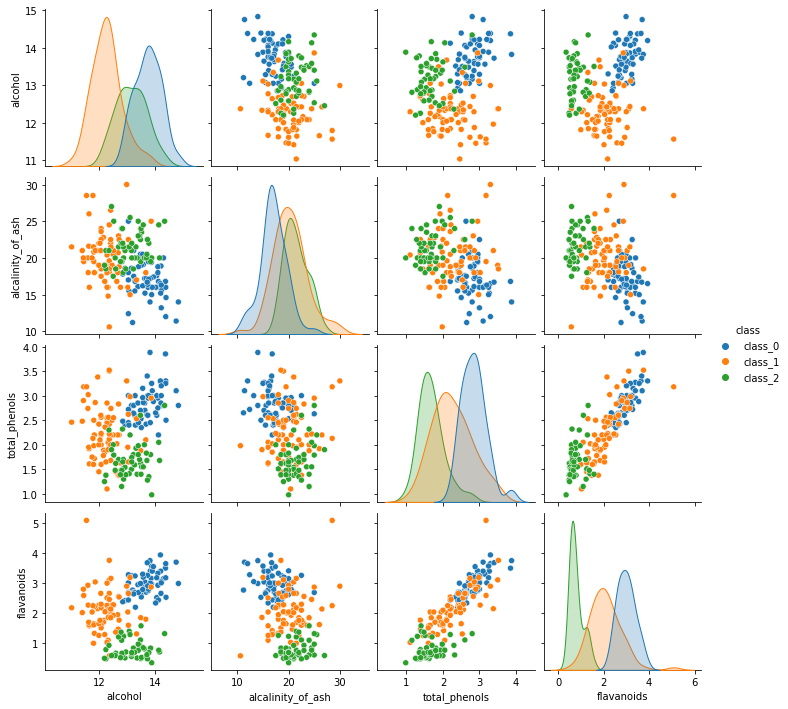

In [25]:
from matplotlib import pyplot as plt
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=df)
plt.show()

In [26]:
df['class'].unique()

['class_0', 'class_1', 'class_2']
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [27]:
# 결측치 확인
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [28]:
# 중복값 여부 확인
df.duplicated().sum()

0

In [36]:
# 결측치/중복값 제거로 전처리 완료 
# 데이터분할 ( 독립변수x, 종속변수y 분할 )
X = df.iloc[:, :2]
y = df['class']

# 학습용 데이터와 테스트용 데이터로 나눔
# randon_state : 데이터 분할 위한 랜덤 시드 / 같은 기준으로 분류를 해야 하기 때문에 동일한 랜덤값으로 ~ 
# stratify : 계층화 방식으로 분할할 경우 참조 대상 ( 범주형 데이터 분류에서 쏠리지 않게 하기 위해 )
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [37]:
X

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [38]:
print("학습용 데이터 수:{0}, 테스트용 데이터 수: {1}".format(len(X_train), len(X_test)))

학습용 데이터 수:133, 테스트용 데이터 수: 45


In [39]:
# DecisionTreeClassifier 객체 생성 
model = DecisionTreeClassifier(random_state=42)
# 학습용 데이터로 학습 수행
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# 의사결정나무 모델을 dot 파일로 추출
export_graphviz(model, out_file='tree.dot')

# dot 파일을 .png로 변환
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree22222.png', '-Gdpi=600'])

# png 출력
Image(filename = 'tree22222.png')

In [41]:
#테스트용 데이터로 모델 평가
score = model.score(X_test, y_test)
score

0.7333333333333333

In [ ]:
# KFold
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X):
    print('-------------------------------------------')
    print("학습용:", train_index)
    print("\n학습용 레이블", y[train_index].unique())
    print("\n\n테스트용:", test_index)
    print("\n테스트용 레이블", y[test_index].unique())

In [34]:
# StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(X, y):
    print('-------------------------------------------')
    print("학습용:", train_index)
    print("\n학습용 레이블", y[train_index].unique())
    print("\n\n테스트용:", test_index)
    print("\n테스트용 레이블", y[test_index].unique())

-------------------------------------------
학습용: [ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177]

학습용 레이블 ['class_0', 'class_1', 'class_2']
Categories (3, object): ['class_0', 'class_1', 'class_2']


테스트용: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145]

테스트용 레이블 ['class_0', 'class_1', 'class_2']
Categories (3, object): ['class_0', 'class_1', 'class_2']
---------------

In [35]:
from sklearn.model_selection import cross_validate

scores = cross_validate(model, X_train, y_train, cv=3, return_estimator=True)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'fit_time': array([0.01765466, 0.0157218 , 0.03397679]),
 'score_time': array([0.00122333, 0.00269485, 0.00299597]),
 'estimator': [LogisticRegression(random_state=42),
  LogisticRegression(random_state=42),
  LogisticRegression(random_state=42)],
 'test_score': array([0.82222222, 0.75      , 0.81818182])}

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

tree_model = DecisionTreeClassifier(random_state=42)
neighbor_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(random_state=42)
forest_model = RandomForestClassifier(n_estimators=300, random_state=42)
logistic_model = LogisticRegression(random_state=42)

model_list = [tree_model, neighbor_model, svm_model, forest_model, logistic_model]

for model in model_list:
    model.fit(X_train , y_train)
    score = model.score(X_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 정확도: {1:.2f}'.format(model_name, score))    

DecisionTreeClassifier 정확도: 0.82
KNeighborsClassifier 정확도: 0.82
SVC 정확도: 0.73
RandomForestClassifier 정확도: 0.84
LogisticRegression 정확도: 0.84


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
